# K-means Clustering을 이용한 도시지역 군집화

In [1]:
popDaytime = []
area = []

with open("C:\\Users\dahyun\Desktop/3학년 스터디\주간인구지수.txt", mode = 'r') as f:
    while True:   
        line = f.readline()
        if not line:
            break
        popDaytime.append(str(line).replace('\n',''))
f.close()

for i, v in enumerate(popDaytime) :
    area.append(v.split('\t')[1])
    popDaytime[i] = v.split('\t')[-1]

print("===============================================================================================================================")
print("                                                           지역명                                                              ")
print("===============================================================================================================================")
print(area)
print("")
print("===============================================================================================================================")
print("                                                        주간인구지수                                                           ")
print("===============================================================================================================================")
print(popDaytime)

                                                           지역명                                                              
['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '수원시', '성남시', '의정부시', '안양시', '부천시', '광명시', '평택시', '동두천시', '안산시', '고양시', '과천시', '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시', '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시', '포천시', '여주시', '연천군', '가평군', '양평군']

                                                        주간인구지수                                                           
['265.70', '372.80', '127.40', '109.60', '92.60', '108.60', '78.30', '92.50', '79.50', '77.40', '84.70', '74.60', '111.20', '119.30', '79.30', '86.70', '105.20', '128.10', '146.10', '89.10', '78.40', '140.70', '188.00', '95.80', '83.60', '90.83', '99.73', '84.09', '91.95', '87.71', '79.94', '105.00', '91.16', '98.18', '85.41', '104.91', '87.82', '81.60

In [2]:
pop = []
extent = []
popDensity = []

with open("C:\\Users\dahyun\Desktop/3학년 스터디\인구수.txt", mode = 'r') as f:
    while True:   
        line = f.readline()
        if not line:
            break
        pop.append(float(str(line).replace('\n','').split('\t')[-1]))
f.close()

with open("C:\\Users\dahyun\Desktop/3학년 스터디\도시지역면적.txt", mode = 'r') as f:
    while True:   
        line = f.readline()
        if not line:
            break
        extent.append(float(str(line).replace('\n','').split('\t')[-1]))
f.close()

for i in range(len(pop)) :
    popDensity.append(pop[i]/extent[i])

print("===============================================================================================================================")
print("                                                          인구밀도                                                             ")
print("===============================================================================================================================")
print(popDensity)

                                                          인구밀도                                                             
[6482.057716436638, 12611.1334002006, 10669.501600365797, 17636.757719714966, 21136.01173020528, 24617.429938482568, 22337.23691311387, 18707.73930753564, 13996.319796954314, 16846.139088729014, 16203.694303440496, 17294.89406043765, 17735.28409090909, 16239.757017176371, 27830.672027570363, 14228.840579710146, 20978.72763419483, 17672.700074794317, 15544.312114989732, 24444.234289200733, 17235.813324315182, 9477.386508273228, 14576.359039190898, 19500.945067926757, 18675.0, 9778.96648505861, 6849.696798758991, 12592.475490196079, 16690.83133766678, 15883.76052385407, 18122.17605816671, 4220.481502400452, 19623.243243243243, 3986.1343133979285, 2400.479541308314, 12104.239888423988, 11963.232201862422, 1750.7796021340835, 8067.7736202058, 2612.4505486302905, 7907.563256325633, 5789.572142989442, 2202.6547721410143, 528.4433913670547, 2578.9027431421446, 2269.88815

In [3]:
%matplotlib qt
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

plt.scatter(popDaytime,popDensity)
plt.xlabel('Daytime Population')
plt.ylabel('Population Density')
plt.title('Daytime Population and Poplation Density in Seoul and Gyeonggi-do')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

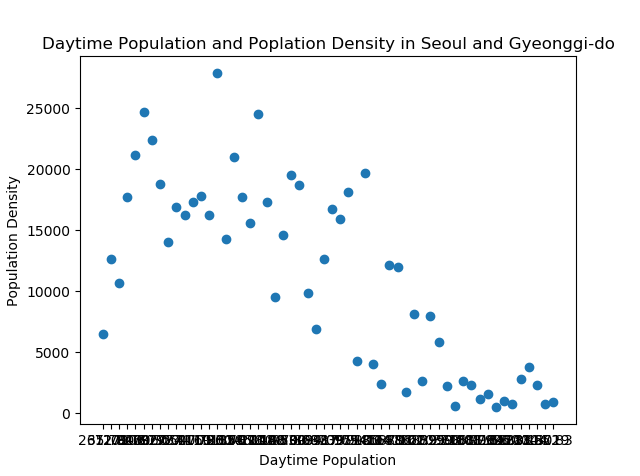

In [4]:
Z = np.array([[popDaytime[i],popDensity[i]] for i in range(len(pop))])

distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Z)
    kmeanModel.fit(Z)
    distortions.append(sum(np.min(cdist(Z, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Z.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

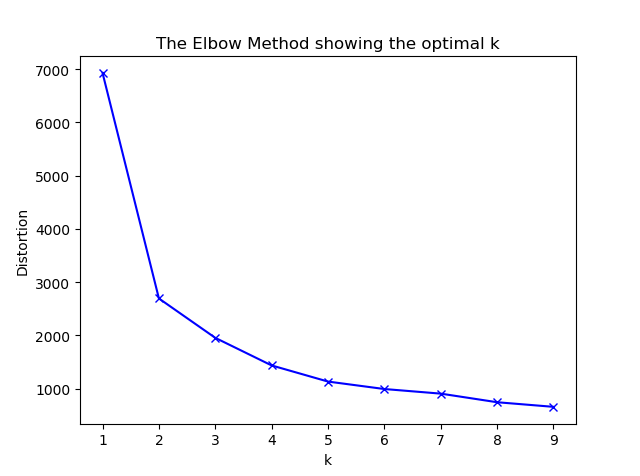

* 가장 크게 꺾인 지점에서의 K값이 최적 K값이다. 따라서 최적 K의 값은 2이다. 

In [5]:
#클러스터의 개수 지정(n개)
num_clusters = 2

#알맞은 매트릭스 Z 삽입
km = KMeans(n_clusters=num_clusters)
km.fit(Z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
result = km.labels_

result_list = [[] for i in range(num_clusters)]

for i, v in enumerate(result) :
    result_list[v].append(area[i])

print(result_list)

[['중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '강남구', '송파구', '강동구', '의정부시', '안양시', '부천시', '광명시', '동두천시', '과천시', '구리시'], ['종로구', '서초구', '수원시', '성남시', '평택시', '안산시', '고양시', '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시', '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시', '포천시', '여주시', '연천군', '가평군', '양평군']]


In [7]:
plt.scatter(popDaytime,popDensity,c=result)
plt.xlabel('Daytime Population')
plt.ylabel('Population Density')
plt.title('Daytime Population and Poplation Density in Seoul and Gyeonggi-do')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

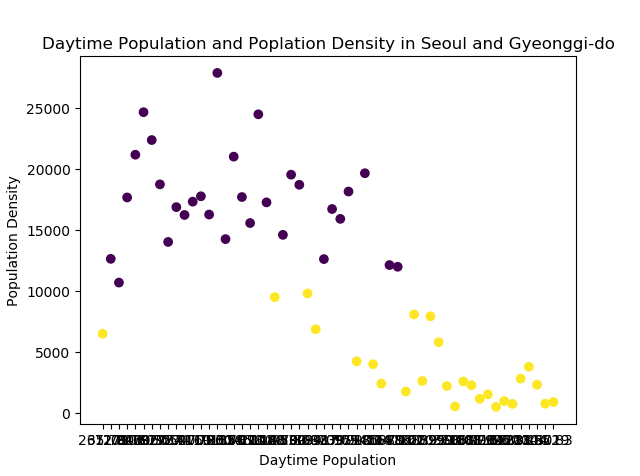

<h1> K=3일때

In [8]:
#클러스터의 개수 지정(n개)
num_clusters = 3

#알맞은 매트릭스 Z 삽입
km = KMeans(n_clusters=num_clusters)
km.fit(Z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
result = km.labels_

plt.scatter(popDaytime,popDensity,c=result)
plt.xlabel('Daytime Population')
plt.ylabel('Population Density')
plt.title('Daytime Population and Poplation Density in Seoul and Gyeonggi-do')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

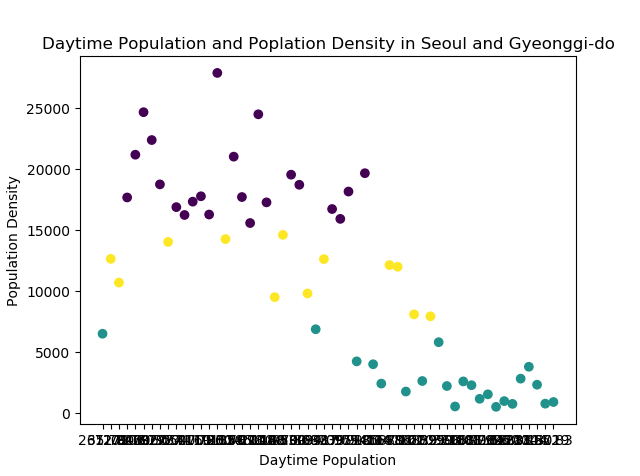